In [1]:
import torch
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from training import train_score_network_mnist

/usr/lib/python3/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/lib/python3/dist-packages/torchvision/image.so: undefined symbol: _ZN3c107WarningC1ENS_7variantIJNS0_11UserWarningENS0_18DeprecationWarningEEEERKNS_14SourceLocationENSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = 'cuda'
data = 'MNIST'
model = Unet(channels = 1, dim = 32).to(device)
model.load_state_dict(torch.load("warmstart")) # Load partially pretrained model to warmstart
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32

In [3]:
tfm = transforms.Compose([transforms.ToTensor(), transforms.Pad(2)])
data = torchvision.datasets.MNIST(f'./data/', transform=tfm, download = True)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=2)

Using decoupled weight decay


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 and Loss: 8.553472518920898


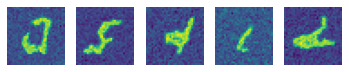

 10%|█         | 1/10 [02:20<21:08, 140.93s/it]

Epoch: 1 and Loss: 8.04025936126709


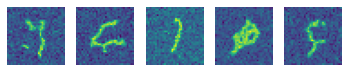

 20%|██        | 2/10 [04:42<18:51, 141.49s/it]

Epoch: 2 and Loss: 7.926933288574219


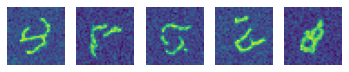

 30%|███       | 3/10 [07:06<16:38, 142.62s/it]

Epoch: 3 and Loss: 8.18713092803955


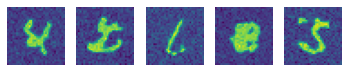

 40%|████      | 4/10 [09:27<14:11, 141.99s/it]

Epoch: 4 and Loss: 7.757587432861328


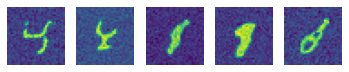

 50%|█████     | 5/10 [11:53<11:57, 143.47s/it]

Epoch: 5 and Loss: 7.838501930236816


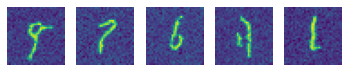

 60%|██████    | 6/10 [14:17<09:33, 143.36s/it]

Epoch: 6 and Loss: 7.579714775085449


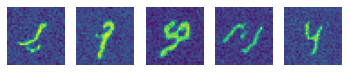

 70%|███████   | 7/10 [16:44<07:14, 144.71s/it]

Epoch: 7 and Loss: 7.417245388031006


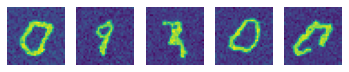

 80%|████████  | 8/10 [19:07<04:48, 144.29s/it]

Epoch: 8 and Loss: 7.252851963043213


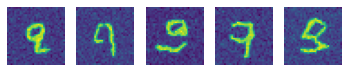

 90%|█████████ | 9/10 [21:34<02:25, 145.10s/it]

Epoch: 9 and Loss: 7.36316442489624


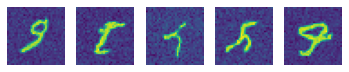

100%|██████████| 10/10 [24:01<00:00, 144.12s/it]


In [4]:
train_score_network_mnist(data_loader, model, sde, epochs=10)